In [1]:
# import require libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('admission.csv')
data.head()

,GMAT,GPA,Work_experience,Admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.7,4,0


In [3]:
# Define dependent and independent variables.
X = data.iloc[:, :3].values
y = data.iloc[:, 3].values
X.shape, y.shape

((40, 3), (40,))

In [4]:
# Converting the dataset into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 3), (8, 3), (32,), (8,))

In [5]:
# Perform feature scaling to rescale the training dataset
sc = StandardScaler()

In [6]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
# Create Logistic Regression Model on training dataset.
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Test the model on testing dataset and predict the output.
y_pred = model.predict(X_test)

Confusion Matrix : 
 [[3 1]
 [1 3]]


<AxesSubplot:>

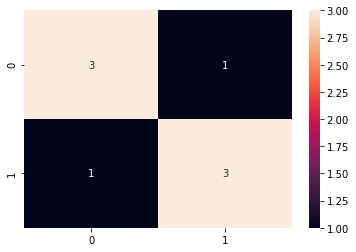

In [11]:
# Analyze the output using confusion matrix.
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True)

In [12]:
# Find the accuracy score.
acc_score = accuracy_score(y_test,y_pred)*100
print("Accuracy Score : ", acc_score)

Accuracy Score :  75.0


In [13]:
# Predict the output for any one new input.
input = [[600, 3.0, 3]]
ans = model.predict(input)
ans = list(map(lambda x: "Accepted" if x else "Rejected", ans))
print("Prediction is : ", ans[0])

Prediction is :  Accepted
